# Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.python.framework import ops
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\gandh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Loading Processed Data

In [2]:
X_train1 = np.loadtxt('X_train1.txt', dtype=float)
X_train2 = np.loadtxt('X_train2.txt', dtype=float)
X_val1 = np.loadtxt('X_val1.txt', dtype=float)
X_val2 = np.loadtxt('X_val2.txt', dtype=float)
X_test1 = np.loadtxt('X_test1.txt', dtype=float)
X_test2 = np.loadtxt('X_test2.txt', dtype=float)
y_train = np.loadtxt("y_train.txt", dtype=float)
y_val = np.loadtxt("y_val.txt", dtype=float)
y_test = np.loadtxt("y_test.txt", dtype=float)

In [3]:
X_train1.T.shape, y_train[np.newaxis].shape

((168, 5103), (1, 5103))

In [4]:
X_train = np.concatenate((X_train1, X_train2), axis=1)
X_val = np.concatenate((X_val1, X_val2), axis=1)

X_train = X_train.T
X_val = X_val.T

y_train=y_train[np.newaxis]
y_val=y_val[np.newaxis]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((200, 5103), (200, 1458), (1, 5103), (1, 1458))

In [5]:
y_train/=1000#np.max(y_train)
y_test/=1000#np.max(y_test)
y_val/=1000#np.max(y_val)

In [6]:
reg = LinearRegression().fit(X_train.T, y_train.T)
y_train_pred = reg.predict(X_train.T)
mse_train = mean_squared_error(y_train.T, y_train_pred)
reg.score(X_train.T, y_train.T)

0.8730152903759949

In [7]:
y_val_pred = reg.predict(X_val.T)
mse_val = mean_squared_error(y_val.T, y_val_pred)
reg.score(X_val.T, y_val.T)

0.8584672066608825

In [8]:
# y_test_max = np.max(y_test)
# y_test/=y_test_max

X_test = np.concatenate((X_test1, X_test2), axis=1)
y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
reg.score(X_test, y_test)
# print(mse_test)

0.8092240213887301

In [11]:
mse_test, mse_val, mse_train

(0.5263125079460435, 0.40448945818291127, 0.35418942755254834)

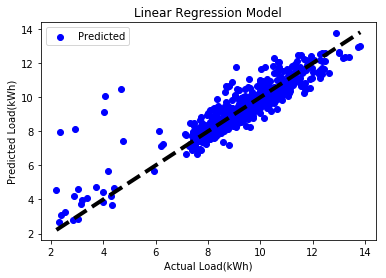

In [10]:
def plot(x,y,x_label=None,y_label=None, title=None, style1=None, color1=None, label1=None, y2=None, label2=None, \
           style2=None, color2=None):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plot1 = plt.scatter(x, y, color=color1)
    plot2, = plt.plot([(y_test).min(), (y_test).max()], [(y_test).min(), (y_test).max()], 'k--', lw=4)
    plt.legend([plot1], [label1, label2])
    plt.show()
    
plot(y_test, y_test_pred, 'Actual Load(kWh)', 'Predicted Load(kWh)',  'Linear Regression Model', \
       style1='.', color1='blue', label1='Predicted', y2=y_test, label2='Actual', \
       style2='--', color2='black')
